In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('watch_history_with_channel.csv')
df

,title,titleUrl,channel_name,time
0,Watched MOM Trying Peri peri fries 😂,https://www.youtube.com/watch?v=azE11nSmkns,Just Banana,2024-09-17T13:46:01.368Z
1,Watched இன்னைக்கு🤔 School-க்கு Lunch என்ன😋⁉️| ...,https://www.youtube.com/watch?v=o9seiO9xpK0,sara nareen,2024-09-17T13:44:50.517Z
2,Watched That’s just absurd 🤨,https://www.youtube.com/watch?v=uGFIX5Fxq_E,Flavors&Tales,2024-09-17T13:43:51.538Z
3,Watched Summer HIBISCUS Hairclip DIY,https://www.youtube.com/watch?v=t4Iokr1B9sY,juliyav,2024-09-17T13:23:48.525Z
4,Watched why am I like this 🫠,https://www.youtube.com/watch?v=7IfHOKmPLS8,Reza & Puja Khan,2024-09-17T13:23:28.442Z
...,...,...,...,...
11916,Watched என்றும் மறக்க முடியாத பழைய நினைவுகள்😍😂...,https://www.youtube.com/watch?v=1-X7ovmq7aA,Kavi Jegan ( கவி ஜெகன் ),2023-08-17T09:04:40.215Z
11917,"Watched agarwood incense, meditation, relaxing...",https://www.youtube.com/watch?v=L61cc682aec,self healing,2023-08-17T09:04:38.907Z
11918,Watched Some Things Will Make You Confused | E...,https://www.youtube.com/watch?v=BX0ZS1oOeAg,Dashboard,2023-08-17T09:04:33.393Z
11919,Watched எந்த Dress நல்லாருக்கு?😍🎉 | Myntra ha...,https://www.youtube.com/watch?v=PBNBm0Rke18,Keerthi Shrathah,2023-08-17T09:04:10.050Z


# Demographic filtering

In [4]:
from collections import Counter

# Select necessary columns
df1 = df[['title', 'titleUrl', 'time']]

# Simulate demographic groups by categorizing videos into 'Categories' (e.g., 'Food', 'Education', etc.)
def categorize_video(title):
    if isinstance(title, str):
        if 'school' in title.lower() or 'lesson' in title.lower() or 'study' in title.lower():
            return 'Education'
        elif 'food' in title.lower() or 'recipe' in title.lower() or 'lunch' in title.lower():
            return 'Food'
        elif 'diy' in title.lower() or 'craft' in title.lower():
            return 'DIY'
        elif 'movie' in title.lower() or 'trailer' in title.lower():
            return 'Entertainment'
        elif 'workout' in title.lower() or 'fitness' in title.lower():
            return 'Fitness'
        else:
            return 'General'
    else:
        return 'Unknown'

# creating a 'Category' column in the dataset
df1['Category'] = df['title'].apply(categorize_video)

# Creating a profile for the user based on the most-watched categories
def get_user_profile(df1):
    category_counts = Counter(df1['Category'])
    return category_counts

user_profile = get_user_profile(df1)
print("User profile based on watch history:")
print(user_profile)

# Simulate recommendations based on the user's top category
top_category = user_profile.most_common(1)[0][0]
print(f"\nTop category for recommendation: {top_category}")

# Recommend videos from the same category that the user hasn't watched yet 
def recommend_videos(df1, top_category, num_recommendations=5):
    # Filter videos from the top category
    recommendations = df1[df1['Category'] == top_category].drop_duplicates(subset=['title']).head(num_recommendations)
    return recommendations[['title', 'titleUrl', 'Category']]

recommended_videos = recommend_videos(df1, top_category)
print("\nRecommended videos:")
recommended_videos


User profile based on watch history:
Counter({'General': 10937, 'Food': 440, 'Entertainment': 224, 'Education': 147, 'DIY': 113, 'Fitness': 60})
Top category for recommendation: General
Recommended videos:


,title,titleUrl,Category
0,Watched MOM Trying Peri peri fries 😂,https://www.youtube.com/watch?v=azE11nSmkns,General
2,Watched That’s just absurd 🤨,https://www.youtube.com/watch?v=uGFIX5Fxq_E,General
4,Watched why am I like this 🫠,https://www.youtube.com/watch?v=7IfHOKmPLS8,General
6,Watched Your friends are gonna help you😉#youtu...,https://www.youtube.com/watch?v=eEozfFC274Q,General
7,Watched A Lion's Response to Rule-Breaking,https://www.youtube.com/watch?v=4MybafPkRK0,General


In [5]:
data = df1
# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'], errors='coerce')

# Extract date and time information
data['date'] = data['time'].dt.date
data['hour'] = data['time'].dt.hour


<Axes: title={'center': 'Viewing Trends by Category'}, xlabel='date'>

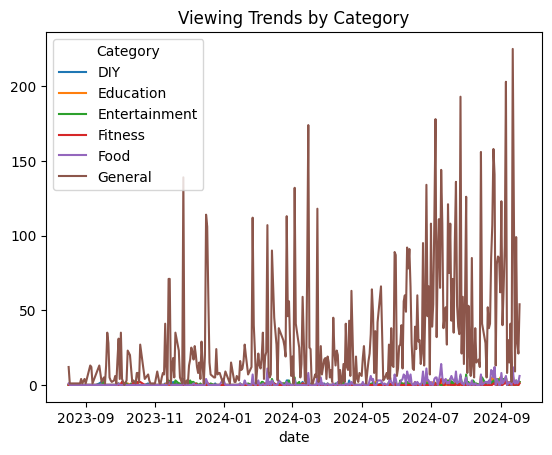

In [6]:
# Grouped by Category and Date to see trends over time
category_trends = df1.groupby(['date', 'Category']).size().unstack(fill_value=0)

category_trends.plot(kind='line', title='Viewing Trends by Category')


# Collaborative filtering


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

df['user_id'] = pd.factorize(df['time'])[0]  # Assign a unique user_id based on the time of watch

# user-item matrix (user_id vs channel_name)
user_item_matrix = df.pivot_table(index='user_id', columns='channel_name', aggfunc='size', fill_value=0)

# Compute cosine similarity between items (channels)
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

#  Recommendation function
def recommend_videos(user_id, user_item_matrix, item_similarity_df, n_recommendations=5):
    # Get the user's watched channels
    watched_channels = user_item_matrix.loc[user_id]
    watched_channels = watched_channels[watched_channels > 0].index.tolist()  # Channels the user has watched

    # Calculate the score for each channel based on similarity to watched channels
    channel_scores = item_similarity_df[watched_channels].sum(axis=1)

    # Remove channels the user has already watched
    channel_scores = channel_scores.drop(watched_channels, errors='ignore')

    # Sort by score and return the top n recommendations
    recommended_channels = channel_scores.sort_values(ascending=False).head(n_recommendations).index.tolist()
    return recommended_channels

# Example Usage
user_id = 0
recommended_channels = recommend_videos(user_id, user_item_matrix, item_similarity_df, n_recommendations=5)

# Output of the recommendations
print(f"Recommended channels for user {user_id}:")
recommended_channels


Recommended channels for user 0:
[' Chaitali Harshil', 'Sai Aashirwad', 'S_J Official shorts', 'SaNthosHaM🌴GaRdeN🌵', 'Saad Qureshi Official']


# Analysis

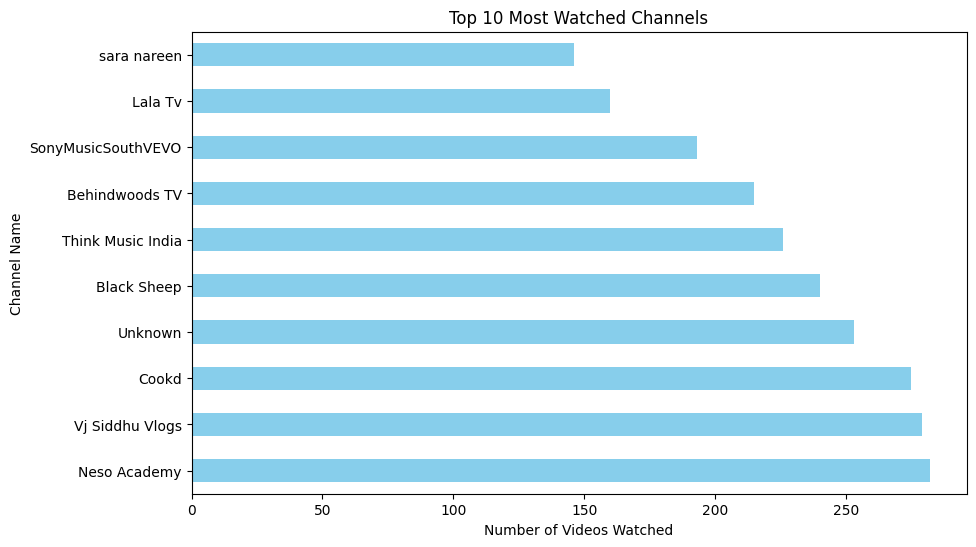

In [9]:
top_channels = df['channel_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_channels.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Watched Channels')
plt.xlabel('Number of Videos Watched')
plt.ylabel('Channel Name')
plt.xticks(rotation=0)
plt.show()

<Axes: title={'center': 'Viewing Patterns by Hour'}, xlabel='hour'>

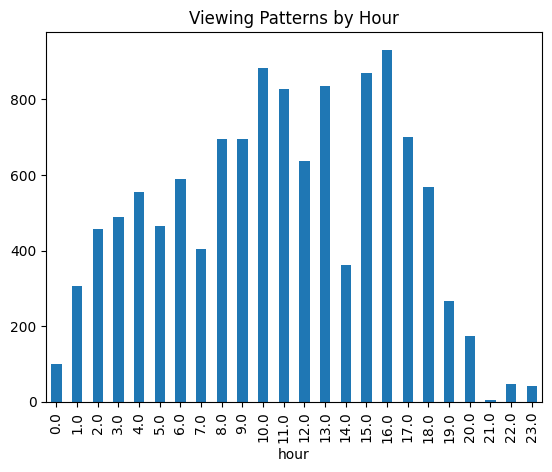

In [10]:
# Group by hour
hourly_trends = data.groupby('hour').size()

hourly_trends.plot(kind='bar', title='Viewing Patterns by Hour')

<Axes: title={'center': 'Watch Time Distribution by Day of the Week'}, xlabel='day_of_week'>

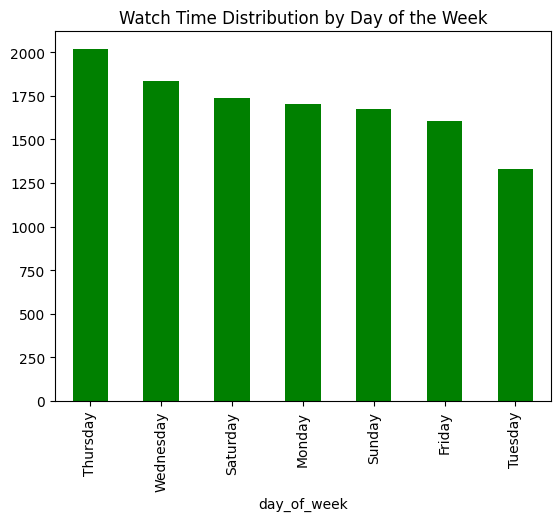

In [11]:
data['day_of_week'] = data['time'].dt.day_name()

watch_count_by_day = data['day_of_week'].value_counts()

watch_count_by_day.plot(kind='bar', title='Watch Time Distribution by Day of the Week', color='green')

<Axes: title={'center': 'Daily Watch Count Over Time'}, xlabel='date'>

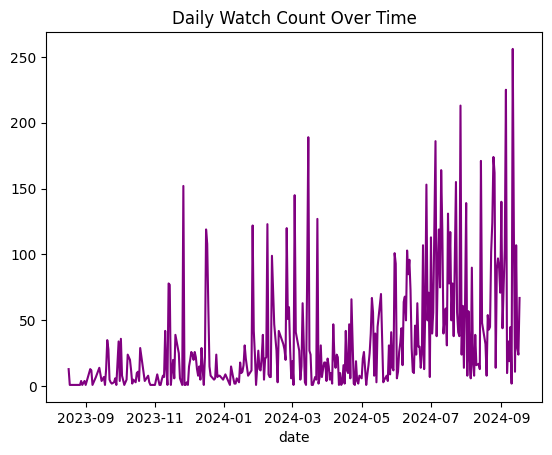

In [12]:
daily_watch_count = data.groupby('date').size()

daily_watch_count.plot(kind='line', title='Daily Watch Count Over Time', color='purple')

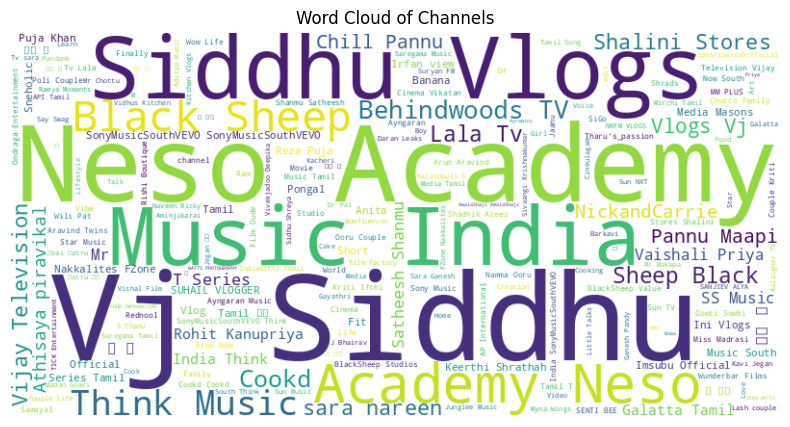

In [14]:
from wordcloud import WordCloud

# Filter out rows with "Unknown" channel names
filtered_df = df[df['channel_name'] != 'Unknown']

all_channels = ' '.join(filtered_df['channel_name'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_channels)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Channels')
plt.show()


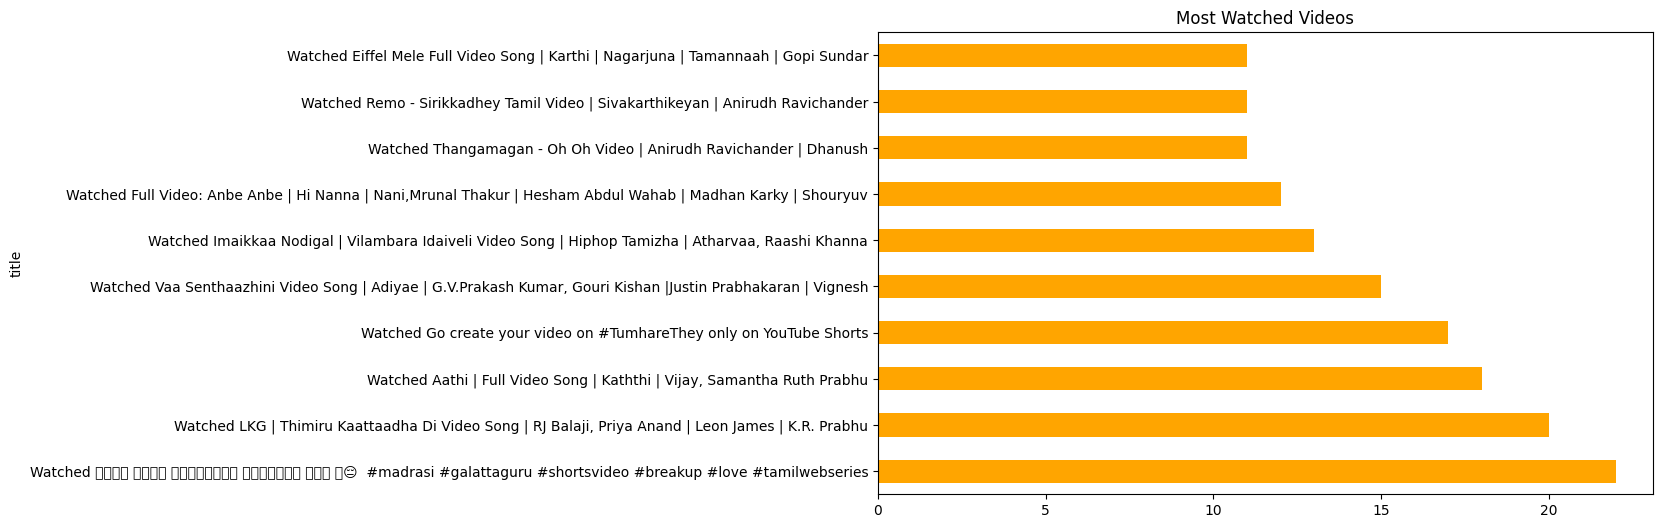

In [15]:
import warnings

# Suppress the warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Count of the number of times each video was watched
    most_watched_videos = df['title'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    most_watched_videos.plot(kind='barh', title='Most Watched Videos', color='orange')

    plt.show()


In [21]:
from langdetect import detect

def detect_language(title):
    try:
        return detect(title)
    except:
        return 'unknown'

# Detect language of each video title
df['language'] = df['title'].apply(detect_language)


The most frequent language in the dataset is: en



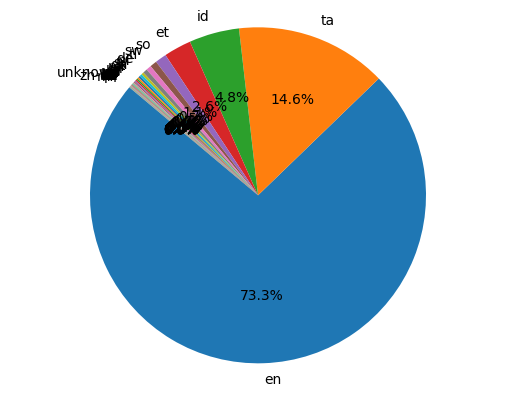

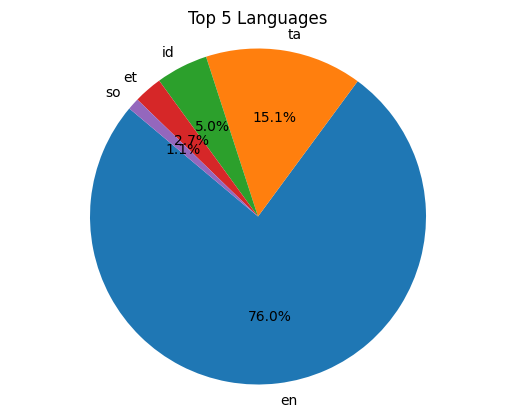

In [33]:
# Counting the occurrence of each language
language_counts = df['language'].value_counts()

top_language = language_counts.idxmax()
print(f"The most frequent language in the dataset is: {top_language}\n")

top_5=language_counts.head(5)

plt.figure()
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()
print('\n')
plt.figure()
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Languages')
plt.axis('equal')
plt.show()

en: English

ta: Tamil

id: Indonesian

so: Somali

et: Estonian

In [3]:
# predefined genres and their associated keywords
genre_dict = {
    'Music': ['song', 'video song', 'album', 'lyrics'],
    'Tech': ['unboxing', 'review', 'technology', 'gadget'],
    'Comedy': ['comedy', 'funny', 'skit', 'standup'],
    'Education': ['tutorial', 'how to', 'lesson', 'lecture', 'course'],
    'Movies': ['movie', 'film', 'trailer', 'scene'],
    'Vlogs' : ['vlog','vlogs','series'],
    'Cooking' : ['cooking','recipe','food'],
    'Short clips': ['YouTube Shorts','shorts']
}

def assign_genre(title):
    title = title.lower()
    for genre, keywords in genre_dict.items():
        if any(keyword in title for keyword in keywords):
            return genre
    return 'Miscellaneous'  #Miscellaneous content that doesn’t belong to a specific genre

df['genre'] = df['title'].apply(assign_genre)

genre_counts = df['genre'].value_counts()

# Display the most frequent genre
top_genre = genre_counts.idxmax()
print(f"The most-watched genre is: {top_genre}")

print('\n',genre_counts)

The most-watched genre is: Miscellaneous

 genre
Miscellaneous    5754
Short clips      2371
Vlogs            1081
Comedy            927
Music             908
Cooking           355
Movies            268
Education         180
Tech               77
Name: count, dtype: int64


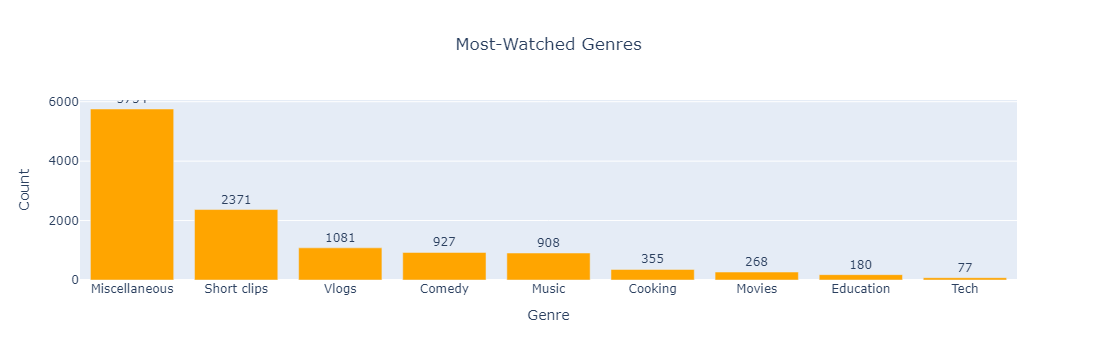

In [5]:
genre_counts = df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

fig = px.bar(genre_counts,
             x='genre',
             y='count',
             title='Most-Watched Genres',
             labels={'count': 'Number of Videos Watched', 'genre': 'Genre'},
             text='count')

fig.update_traces(marker_color='orange', textposition='outside')
fig.update_layout(xaxis_title='Genre', yaxis_title='Count', title_x=0.5)

fig.show()